In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential, metrics
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, UpSampling2D, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from keras.datasets import cifar10
(X_train, _), (X_test, _) = cifar10.load_data()

In [5]:
X_train = X_train/255.0
X_test= X_test/255.0

In [6]:
#training_set = train_data.flow_from_directory('./jpg/train', batch_size = 32, target_size = (64,64))

In [7]:
#test_set = test_data.flow_from_directory('jpg/test', batch_size = 32, target_size = (64,64))

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))  #32*32*3
model.add(BatchNormalization())  #32*32*32
model.add(Conv2D(32,(3,3), strides = 2, padding = 'same',activation = 'relu'))  #16*16*32
model.add(Conv2D(32,(3,3), strides = 1, padding = 'same',activation = 'relu'))  #16*16*32
model.add(BatchNormalization())

model.add(UpSampling2D())  #32*32*32
model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))  #32*32*32

model.add(BatchNormalization())
model.add(Conv2D(3, (1, 1), activation='sigmoid', padding='same'))  #32*32*3

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [21]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'mse')

bar = tf.keras.callbacks.ProgbarLogger(count_mode = 'samples')

In [22]:
with tf.device('/gpu:0'):
    model.fit(X_train, X_train,
         epochs = 2,
         verbose = 1,
         batch_size = 100,
         validation_data = (X_test, X_test),     
         callbacks = [bar])

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
Epoch 1/2
50000/50000 [==============================] - 26s 524us/sample - loss: 0.0011 - accuracy: 0.8212 - val_loss: 0.0010 - val_accuracy: 0.7801
Epoch 2/2
Epoch 2/2
50000/50000 [==============================] - 34s 672us/sample - loss: 6.9310e-04 - accuracy: 0.8585 - val_loss: 6.0233e-04 - val_accuracy: 0.8073


In [23]:
decoded = model.predict(X_test)

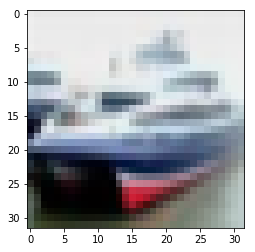

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_test[1])
plt.show()

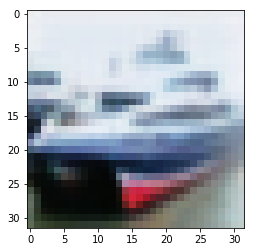

In [35]:
plt.imshow(decoded[1])

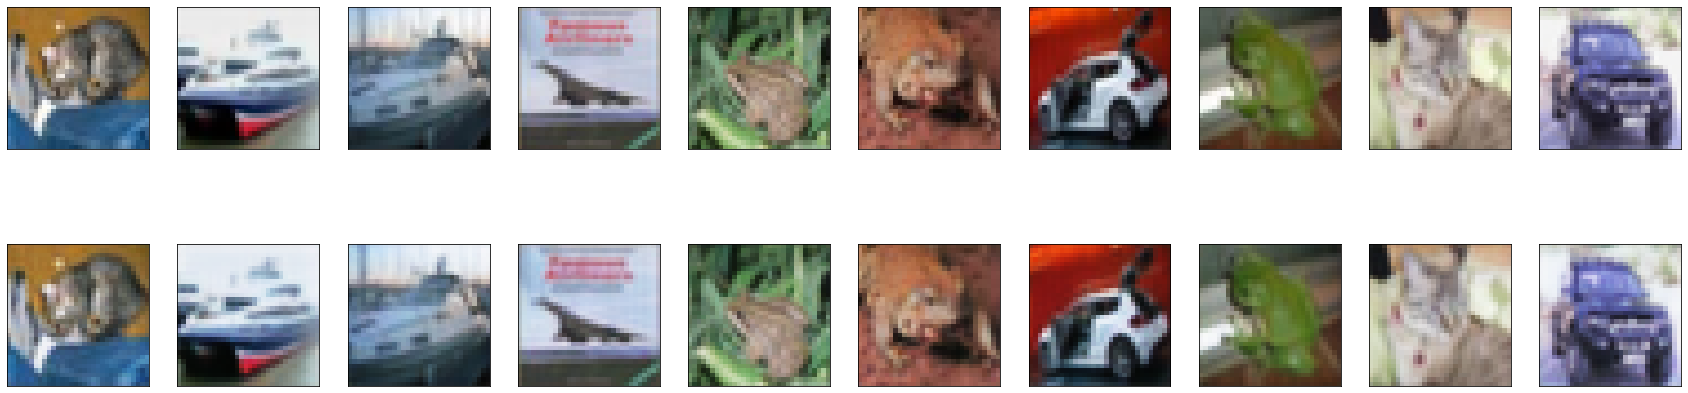

In [34]:
plt.figure(figsize = (30,8))
for i in range(10):
    ax = plt.subplot(2,10, i+1)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,10,i+11)
    plt.imshow(decoded[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
X_t